In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MABarbadillo/
%cd 'GWP/GWP files'
import os

In [4]:
##Install rosetta

!pip install rosetta-soil
from rosetta import rosetta, SoilData

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.3 MB/s eta 0:00:00


mean =  [[ 0.01960586  0.4322467  -1.31364824  0.13058906  2.28911681]
 [ 0.03641117  0.42522559 -1.46516696  0.12924389  1.91250989]
 [ 0.05474858  0.36516956 -1.47308453  0.12016123  1.34639952]
 ...
 [ 0.05917575  0.50459841 -2.03151692  0.15002369  1.83554728]
 [ 0.07105733  0.43736769 -1.79906869  0.10703039  1.05491774]
 [ 0.07225008  0.47702418 -2.26716735  0.15989478  1.20833645]]
thetar =  [0.019605862310376344, 0.03641116884236753, 0.05474857959565542, 0.03310334750628149, 0.04283592349552427, 0.04298037457659882, 0.060562902729090214, 0.06642032799011376, 0.06396972874845985, 0.05397384860403138, 0.0646054456235443, 0.0739662263136753, 0.02361859104080091, 0.027956415186720575, 0.04742997625045277, 0.019562980626081982, 0.018604344562925517, 0.015331693952052935, 0.02176076944348748, 0.03818589975972806, 0.05715802287873966, 0.06490707439331372, 0.06469804370888813, 0.07125712682698468, 0.037079953713248195, 0.04695594504271806, 0.05529842708709088, 0.04313297598615848, 0.05

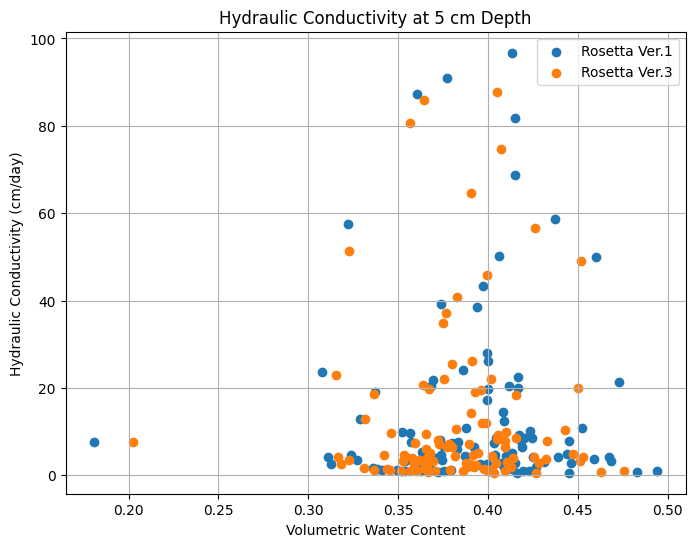

In [11]:
#### Version_1.1
#### Comparing hydraulic conductivity values using K0 + L + Rosetta 1 parameters with values obtained using K0 + L=0.5 + Rosetta 3 parameters
#### Using the percent sand, silt, clay, bulk density, and volumetric water contents at -33 and -1500 kPa from 'MesoSoilv1_3.csv' file
#### Using matric potential data from 'longtermmeans.csv' file in the 'Mesotoobox - MesoSoilv1_3 Database' folder
#### Data were from 125 Mesonet sites at depths 5, 25, and 60 cm from 1998 to 2014 (long term mean).


import numpy as np   #Library that helps in numerical calculations
import pandas as pd  #Library used for handling structured data
                     #In this case, pandas read the csv file and convert the data into data frame (i.e., tables with rows and columns)

# Read the 'MesoSoilv1_3.csv' file, skipping the first row and using the second row as header
df = pd.read_csv('/content/drive/MyDrive/MABarbadillo/GWP/GWP files/MesoSoilv1_3.csv', header=0, skiprows=1)

# Extract the data from the specified columns
# In python, rows and columns start at 0
# .iloc is used for integer-location based indexing
# .values.tolist() converts the selected portion of the data frame into nested list format which is more flexible and covenient
# From the data frame, values needed are from depths 5, 25, and 60 which are all in odd rows
# 1::2 specifies to start reading from the second row and select the second row after that

data = df.iloc[1::2, [2, 3, 4, 5, 6, 7]].values.tolist()                                     #integers 2, 3, 4, 5, 6, and 7 specify the columns for %sand, silt, clay, bulk density (g/cm3), and volumetric water contents (cm3/cm3) at -33 and -1500 kPa, respectively
K0 = [float(item) for sublist in df.iloc[1::2, [13]].values.tolist() for item in sublist]    #extracts and converts the K0 parameter from the data frame to a float
L1 = [float(item) for sublist in df.iloc[1::2, [14]].values.tolist() for item in sublist]    #extracts and converts the L parameter from the data frame to a float
L3 = 0.5      #default value

##########################################################################################################################

# Call the function to get hydraulic parameters
mean_1, stdev_1, codes_1 = rosetta(1, SoilData.from_array(data))    #for Rosetta Ver.1
mean_3, stdev_3, codes_3 = rosetta(3, SoilData.from_array(data))    #for Rosetta Ver.3

# Extract the hydraulic parameter values from the array using Rosetta Ver.1
# Converts everything into a float before performing the operation for m1 and m3
# item[] indicates the column number

#### I think the order of the hydraulic parameters from Rosetta is this: theta_r, theta_s, n, and alpha
   # (not theta_r, theta_s, alpha, and n, which is how the parameters are arranged in MesoSoilv1_3.csv file)

theta_r1 = [float(item[0]) for item in mean_1]
theta_s1 = [float(item[1]) for item in mean_1]
alpha1 = [float(item[3]) for item in mean_1]
n1 = [float(item[2]) for item in mean_1]
m1 = [1 - (1 / value) for value in n1]

# Extract the hydraulic parameter values from the array using Rosetta Ver.3
theta_r3 = [float(item[0]) for item in mean_3]
theta_s3 = [float(item[1]) for item in mean_3]
alpha3 = [float(item[3]) for item in mean_3]
n3 = [float(item[2]) for item in mean_3]
m3 = [1 - (1 / value) for value in n3]

##########################################################################################################################

# Reading the 'longtermmeans.csv' file containing the matric potentials [kPa] at 5, 25, 60 cm depth for 125 Mesonet sites
df1 = pd.read_csv('/content/drive/MyDrive/MABarbadillo/GWP/GWP files/longtermmeans.csv')

# Melt the DataFrame to convert columns MP05, MP25, and MP60 into rows with a name Matric_Potential'
# Arrangement should be similar to the arrangement in the MesoSoilv1_3.csv file
# STID = Station ID
# Sort the DataFrame by 'STID' and 'Depth' to maintain the order of the sites and depths
# Reset the index
# Remove the first three entries (string variables) [.iloc[3:]]


melted_df = df1.melt(id_vars=['STID'], value_vars=['MP05', 'MP25', 'MP60'], var_name='Depth',
                     value_name='Matric_Potential').sort_values(by=['STID', 'Depth']).reset_index(drop=True).iloc[3:]

# Convert the values in the 'Matric_Potential' column of the DataFrame melted_df into numeric data types and store as matric_potential
matric_potential = melted_df['Matric_Potential'].apply(pd.to_numeric, errors='coerce').tolist()

##########################################################################################################################

# Convert matric potential to volumetric water content (vwc) [cm3/cm3] for Rosetta Ver.1
# np.real extracts the real number
# Element-wise based calculation [i]
vwc1 = [theta_r1[i] + np.real((theta_s1[i] - theta_r1[i]) *
 (1 / (1 + (-alpha1[i] * matric_potential[i])**n1[i])**m1[i])) for i in range(len(matric_potential))]

# Convert matric potential to volumetric water content (vwc) [cm3/cm3] for Rosetta Ver.3
vwc3 = [theta_r3[i] + np.real((theta_s3[i] - theta_r3[i]) *
 (1 / (1 + (-alpha3[i] * matric_potential[i])**n3[i])**m3[i]))for i in range(len(matric_potential))]

# Convert volumetric water content to Effective saturation (Se) [cm3/cm3] for Rosetta Ver.1
Se1 = [(vwc1[i] - theta_r1[i])/(theta_s1[i] - theta_r1[i]) for i in range(len(vwc1)) ]
# Convert volumetric water content to Effective saturation (Se) [cm3/cm3] for Rosetta Ver.3
Se3 = [(vwc3[i] - theta_r3[i])/(theta_s3[i] - theta_r3[i]) for i in range(len(vwc3)) ]

##########################################################################################################################

# Calculate Hydraulic conductivity [cm/day] for Rosetta Ver.1
K_Se1 = [(K0[i]*Se1[i]**L1[i]) * (1 - (1-Se1[i]**(n1[i]/n1[i]-1))**m1[i])**2 for i in range(len(Se1))]
# selecting every third element from the list 'K_Se1' that corresponds to the value at 5, 25, and 60 cm depths
K_Se1_5cm = K_Se1[0::3]
K_Se1_25cm = K_Se1[1::3]
K_Se1_60cm = K_Se1[2::3]

# Calculate Hydraulic conductivity [cm/day] for Rosetta Ver.3
K_Se3 = [(K0[i]*Se3[i]**L3) * (1 - (1-Se3[i]**(n3[i]/n3[i]-1))**m3[i])**2 for i in range(len(Se3))]
# selecting every third element from the list 'K_Se3' that corresponds to the value at 5, 25, and 60 cm depths
K_Se3_5cm = K_Se3[0::3]
K_Se3_25cm = K_Se3[1::3]
K_Se3_60cm = K_Se3[2::3]

##########################################################################################################################

#Printing of results

print('mean = ', mean_1)
print('thetar = ', theta_r1)
print('thetas = ', theta_s1)
print('alpha = ', alpha1)
print('n = ', n1)
print('m = ', m1)
print('matric potential = ', matric_potential)
print('vwc_R1 = ', vwc1)
print('vwc_R3 = ', vwc3)
print('Se_R1 = ', Se1)
print('Se_R3 = ', Se3)
print('K_SeR1 = ', K_Se1)
print('K_SeR3 = ', K_Se3)
print('K_5cm_R1 = ', K_Se1_5cm)
print('K_5cm_R3 = ', K_Se3_5cm)
print('K_25cm_R1 = ', K_Se1_25cm)
print('K_25cm_R3 = ', K_Se3_25cm)
print('K_60cm_R1 = ', K_Se1_60cm)
print('K_60cm_R3 = ', K_Se3_60cm)

##########################################################################################################################

#Plotting of results

import matplotlib.pyplot as plt

# Create lists to store valid data points
vwc1_5cm_valid = []
K_Se1_5cm_valid = []
vwc3_5cm_valid = []
K_Se3_5cm_valid = []

# Filter out NaN values for Rosetta Ver.1
for vwc, K in zip(vwc1, K_Se1_5cm):
    if not np.isnan(vwc) and not np.isnan(K):
        vwc1_5cm_valid.append(vwc)
        K_Se1_5cm_valid.append(K)

# Filter out NaN values for Rosetta Ver.3
for vwc, K in zip(vwc3, K_Se3_5cm):
    if not np.isnan(vwc) and not np.isnan(K):
        vwc3_5cm_valid.append(vwc)
        K_Se3_5cm_valid.append(K)

# Convert lists to numpy arrays
vwc1_5cm_valid = np.array(vwc1_5cm_valid)
K_Se1_5cm_valid = np.array(K_Se1_5cm_valid)
vwc3_5cm_valid = np.array(vwc3_5cm_valid)
K_Se3_5cm_valid = np.array(K_Se3_5cm_valid)

# Plotting
plt.figure(figsize=(8, 6))

# Plot for 5 cm depth
plt.scatter(vwc1_5cm_valid, K_Se1_5cm_valid, label='Rosetta Ver.1')
plt.scatter(vwc3_5cm_valid, K_Se3_5cm_valid, label='Rosetta Ver.3')
plt.title('Hydraulic Conductivity at 5 cm Depth')
plt.xlabel('Volumetric Water Content')
plt.ylabel('Hydraulic Conductivity (cm/day)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
##### Version_1.0
##### Using data directly from Mesonet for years 1998 to 2014

import numpy as np   #Library that helps in numerical calculations
import pandas as pd  #Library used for handling structured data
                     #In this case, pandas read the csv file and convert the data into data frame (i.e., tables with rows and columns)

# Read the 'MesoSoilv1_3.csv' file, skipping the first row and using the second row as header
# In python, rows and columns start at 0
# .iloc is used for integer-location based indexing
# .values.tolist() converts the selected portion of the data frame into nested list format which is more flexible and covenient

df = pd.read_csv('/content/drive/MyDrive/MABarbadillo/GWP/GWP files/MesoSoilv1_3.csv', header=0, skiprows=1)
data = df.iloc[1:, [2, 3, 4, 5, 6, 7]].values.tolist()      #integers 2, 3, 4, 5, 6, and 7 specify the columns for %sand, silt, clay, bulk density (g/cm3), and volumetric water contents (cm3/cm3) at -33 and -1500 kPa, respectively
K0 = df.iloc[1:, [13]].values.tolist()                      #K0 parameter from the csv file
L1 = df.iloc[1:, [14]].values.tolist()                      #L parameter from the csv file
L3 = 0.5   #default value

# Call the function to get hydraulic parameters
mean_1, stdev_1, codes_1 = rosetta(1, SoilData.from_array(data))    #for Rosetta Ver.1
mean_3, stdev_3, codes_3 = rosetta(3, SoilData.from_array(data))    #for Rosetta Ver.3

# Extract the hydraulic parameter values from the array using Rosetta Ver.1
# Converts everything into a float before performing the operation for m1 and m3
# item[] indicates the column number
theta_r1 = [float(item[0]) for item in mean_1]
theta_s1 = [float(item[1]) for item in mean_1]
alpha1 = [float(item[2]) for item in mean_1]
n1 = [float(item[3]) for item in mean_1]
m1 = [1 - (1 / value) for value in n1]

# Extract the hydraulic parameter values from the array using Rosetta Ver.3
theta_r3 = [float(item[0]) for item in mean_3]
theta_s3 = [float(item[1]) for item in mean_3]
alpha3 = [float(item[2]) for item in mean_3]
n3 = [float(item[3]) for item in mean_3]
m3 = [1 - (1 / value) for value in n3]

# To get the matric potential from #__# Mesonet sites for years 1998-2014 at depths 5, 25, 60, and 75 cm
# Read .csv file
# Daily reference temperature
####### Not sure about the data set: whether it matches the previous data or not
df1 = pd.read_csv('/content/drive/MyDrive/MABarbadillo/GWP/GWP files/Mesonet_file.csv')
ref_Temperature = df1.iloc[1:, [5, 6, 7, 8]].values.tolist()      #Reference temperature at depths 5, 25, 60, and 75 cm
df1.iloc[1:, [5, 6, 7, 8]] = df1.iloc[1:, [5, 6, 7, 8]].applymap(lambda x: np.nan if x < 0 else x)   #Replaces values <0 to NAN
c = 0.717  #calibration constant [kPa]
a = 1.788  #calibration constant [1/C]

matric_potential = []                                             #stores the calculated matric potential values for each depth
for temperatures in ref_Temperature:
    mp_depth = [-c * np.exp(a * temp) for temp in temperatures]   #stores matric potential values for each depth
    matric_potential.append(mp_depth)                             #ensures that matric potentials are calculated based on reference temperature values at specific depth

# Convert matric potential to volumetric water content (vwc) for Rosetta Ver.1
vwc1 = theta_r1 + (theta_s1 - theta_r1) * (1 / (1 + (-alpha1 * matric_potential)**n1)**m1)    #cm3/cm3
# Convert matric potential to volumetric water content (vwc) for Rosetta Ver.3
vwc3 = theta_r3 + (theta_s3 - theta_r3) * (1 / (1 + (-alpha3 * matric_potential)**n3)**m3)    #cm3/cm3

# Convert volumetric water content to Effective saturation (Se) for Rosetta Ver.1
Se1 = (vwc1 - theta_r1)/(theta_s1 - theta_r1)    #cm3/cm3
# Convert volumetric water content to Effective saturation (Se) for Rosetta Ver.3
Se3 = (vwc3 - theta_r3)/(theta_s3 - theta_r3)    #cm3/cm3

# Calculate Hydraulic conductivity for Rosetta Ver.1
K_Se1 = (K0*Se1**L1) * (1 - (1-Se1**(n1/n1-1))**m1)**2    #cm/day
# Calculate Hydraulic conductivity for Rosetta Ver.3
# K0 values from 'MesoSoilv1_3.csv' were used
# L3 = 0.5
K_Se3 = (K0*Se3**L3) * (1 - (1-Se3**(n3/n3-1))**m3)**2    #cm/day